In [ ]:
pip install scikit-learn

In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing import image
import cv2

In [4]:
# Chargement des images
def load_images_from_folder(folder, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Charger les données
def load_data():
    # Chemins vers vos sous-dossiers
    pop_folder = "data/Pop"
    jazz_folder = "data/Jazz"
    death_metal_folder = "data/Death_Metal"

    pop_images, pop_labels = load_images_from_folder(pop_folder, 0)  # 0 pour Pop
    jazz_images, jazz_labels = load_images_from_folder(jazz_folder, 1)  # 1 pour Jazz
    death_metal_images, death_metal_labels = load_images_from_folder(death_metal_folder, 2)  # 2 pour Death Metal

    # Combiner les données
    images = np.array(pop_images + jazz_images + death_metal_images)
    labels = np.array(pop_labels + jazz_labels + death_metal_labels)

    return images, labels

# Prétraitement des images : normalisation et vectorisation
def preprocess_images(images):
    # Normalisation : Diviser par 255 pour que les pixels soient dans [0, 1]
    images = images.astype('float32') / 255.0

    # Aplatir les images en vecteurs (224 x 224 x 3 -> 150528)
    images = images.reshape(images.shape[0], -1)
    
    # Application de PCA pour réduire la dimensionnalité (environ 500 dimensions pour un bon compromis)
    pca = PCA(n_components=500)
    images = pca.fit_transform(images)
    
    return images


In [ ]:
# Charger les données
images, labels = load_data()

In [11]:
# Print the number of genre in all the labels

unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)

{np.int64(0): np.int64(948), np.int64(1): np.int64(943), np.int64(2): np.int64(889)}


In [12]:
# Diviser les données en training et test set
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
# Prétraiter les images
X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

# Standardisation (important pour SVM et KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=60),
        "SVM": SVC(),
        "Logistic Regression": LogisticRegression(max_iter=1000)
    }

    for name, model in models.items():
        # Validation croisée
        print(f"Validation croisée pour {name} :")
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
        
        # Entraînement et évaluation du modèle
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [18]:
# Evaluer les modèles
evaluate_models(X_train, X_test, y_train, y_test)

Validation croisée pour KNN :
Cross-validation accuracy: 0.3898 ± 0.0357
KNN Accuracy: 0.3417
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.82      0.48       187
           1       0.00      0.00      0.00       192
           2       0.35      0.21      0.26       177

    accuracy                           0.34       556
   macro avg       0.23      0.34      0.25       556
weighted avg       0.23      0.34      0.24       556

Validation croisée pour SVM :


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation accuracy: 0.4856 ± 0.0171
SVM Accuracy: 0.3993
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       187
           1       0.36      0.54      0.43       192
           2       0.39      0.31      0.34       177

    accuracy                           0.40       556
   macro avg       0.41      0.40      0.39       556
weighted avg       0.41      0.40      0.39       556

Validation croisée pour Logistic Regression :
Cross-validation accuracy: 0.4429 ± 0.0161
Logistic Regression Accuracy: 0.3669
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       187
           1       0.37      0.35      0.36       192
           2       0.36      0.37      0.37       177

    accuracy                           0.37       556
   macro avg       0.37      0.37      0.37       556
weighted avg       0.37      0.37      0.37       556



Neural Network handmade :

In [ ]:
pip install tensorflow[and-cuda]

In [ ]:
pip install matplotlib

In [ ]:
pip install scipy

In [18]:
pip install --upgrade tensorflow keras numpy pandas sklearn pillow


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

2025-01-11 12:11:41.970159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736597501.990629   12187 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736597501.996897   12187 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 12:11:42.018744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2226 images belonging to 3 classes.
Found 554 images belonging to 3 classes.

Training model with 1 hidden layers...


I0000 00:00:1736597504.982261   12187 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13764 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:86:00.0, compute capability: 7.5
/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1736597507.541550   12644 service.cc:148] XLA service 0x7f9bc0005b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736597507.541620   12644 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-01-11 12:11:47.569290: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736597507.650049   12644 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/70 ━━━━━━━━━━━━━━━━━━━━ 2:29 2s/step - accuracy: 0.2812 - loss: 1.2806

I0000 00:00:1736597508.638014   12644 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3448 - loss: 43.6668

/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - accuracy: 0.3452 - loss: 43.3307 - val_accuracy: 0.3917 - val_loss: 2.2614
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 352ms/step - accuracy: 0.3690 - loss: 4.2489 - val_accuracy: 0.3357 - val_loss: 11.5545
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 359ms/step - accuracy: 0.3514 - loss: 6.2696 - val_accuracy: 0.4079 - val_loss: 3.2733
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - accuracy: 0.4160 - loss: 3.3463 - val_accuracy: 0.3953 - val_loss: 1.3939
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 361ms/step - accuracy: 0.3844 - loss: 1.8757 - val_accuracy: 0.3935 - val_loss: 1.3852
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - accuracy: 0.3721 - loss: 1.7037 - val_accuracy: 0.3502 - val_loss: 3.4620
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 360ms/step - accuracy: 0.3809 - loss: 2.4113 - val_accuracy: 0.3899 - val_loss: 2.4251
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 358ms/step - accuracy: 0.4141 - loss: 1.7116 - val_accuracy: 0.3

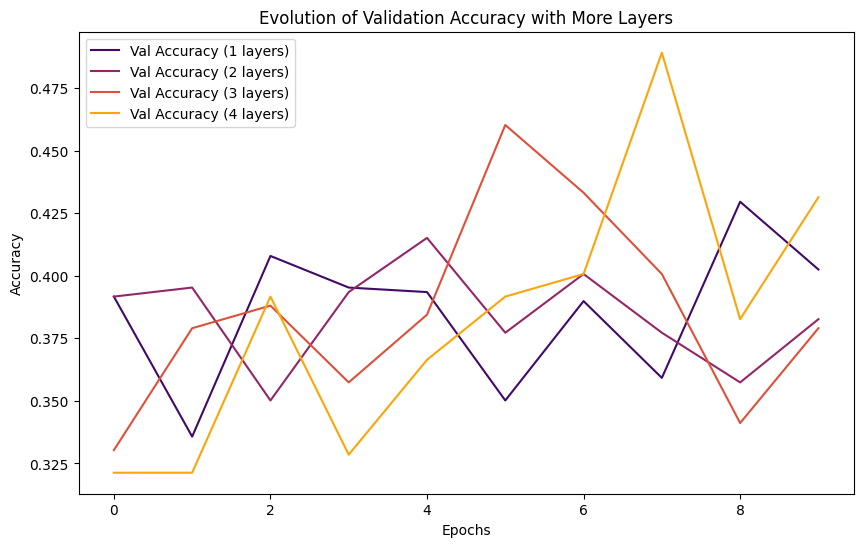

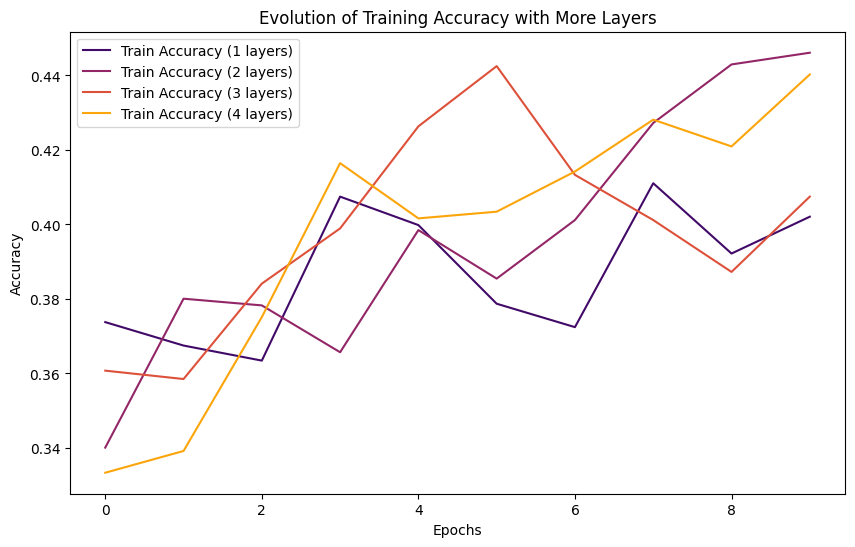

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.cm as cm

# 1. Data preprocessing
data_dir = "data"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 2. Function to build model
def build_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())

    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 3. Training models
layer_counts = [1, 2, 3, 4]
history_per_layer = {}

for num_layers in layer_counts:
    print(f"\nTraining model with {num_layers} hidden layers...")
    model = build_model(num_layers)
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )
    history_per_layer[num_layers] = history

# 4. Plotting the results
colors = cm.inferno(np.linspace(0.2, 0.8, len(layer_counts)))

# Plot validation accuracy
plt.figure(figsize=(10, 6))
for num_layers, color in zip(layer_counts, colors):
    plt.plot(history_per_layer[num_layers].history['val_accuracy'], 
             label=f'Val Accuracy ({num_layers} layers)', color=color)
plt.title('Evolution of Validation Accuracy with More Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training accuracy
plt.figure(figsize=(10, 6))
for num_layers, color in zip(layer_counts, colors):
    plt.plot(history_per_layer[num_layers].history['accuracy'], 
             label=f'Train Accuracy ({num_layers} layers)', color=color)
plt.title('Evolution of Training Accuracy with More Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


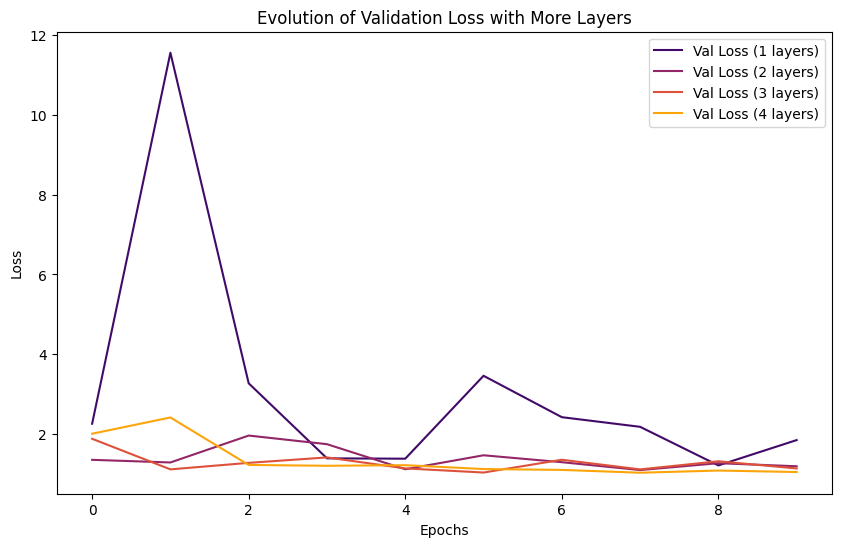

In [4]:
import matplotlib.cm as cm
import numpy as np

# Génération de couleurs cohérentes pour chaque nombre de couches
colors = cm.inferno(np.linspace(0.2, 0.8, len(history_per_layer)))

# Tracé de la validation loss uniquement
plt.figure(figsize=(10, 6))
for (num_layers, history), color in zip(history_per_layer.items(), colors):
    plt.plot(history.history['val_loss'], label=f'Val Loss ({num_layers} layers)', color=color)

plt.title('Evolution of Validation Loss with More Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score

# Classes du générateur
class_names = list(validation_generator.class_indices.keys())
num_classes = len(class_names)

# Prédictions et vraies étiquettes
predictions = np.argmax(model.predict(validation_generator), axis=1)
true_labels = validation_generator.classes

# Calcul de l'accuracy par classe
class_accuracies = {}
for class_idx in range(num_classes):
    class_mask = (true_labels == class_idx)
    class_accuracy = accuracy_score(true_labels[class_mask], predictions[class_mask])
    class_accuracies[class_names[class_idx]] = class_accuracy

# Affichage des résultats
print("Accuracy par classe :")
for class_name, acc in class_accuracies.items():
    print(f"{class_name}: {acc:.2%}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step
Accuracy par classe :
Death_Metal: 32.20%
Jazz: 5.85%
Pop: 59.26%


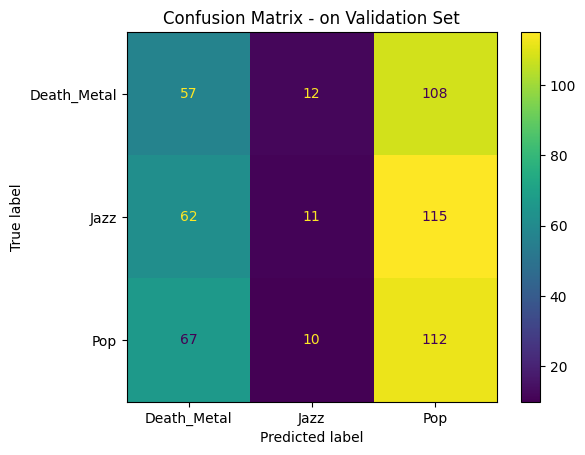

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(true_labels, predictions, labels=np.arange(num_classes))

# Affichage de la matrice
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', colorbar=True)
plt.title("Confusion Matrix - on Validation Set")
plt.show()


In [10]:
import numpy as np

# Calcul des proportions de prédictions pour chaque classe
unique, counts = np.unique(predictions, return_counts=True)
proportions = dict(zip(class_names, counts / len(predictions)))

print("Proportions des prédictions par classe :")
for class_name, prop in proportions.items():
    print(f"{class_name}: {prop:.2%}")


Proportions des prédictions par classe :
Death_Metal: 33.57%
Jazz: 5.96%
Pop: 60.47%


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy globale : {accuracy:.2%}")


Accuracy globale : 32.49%



Entraînement du modèle avec 4 layers et 7 epochs...
Epoch 1/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 367ms/step - accuracy: 0.3233 - loss: 10.0893 - val_accuracy: 0.3412 - val_loss: 1.6043
Epoch 2/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 352ms/step - accuracy: 0.3668 - loss: 1.4186 - val_accuracy: 0.4043 - val_loss: 1.0744
Epoch 3/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 351ms/step - accuracy: 0.4131 - loss: 1.1228 - val_accuracy: 0.3971 - val_loss: 1.1578
Epoch 4/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 354ms/step - accuracy: 0.4058 - loss: 1.2309 - val_accuracy: 0.3971 - val_loss: 1.1622
Epoch 5/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 353ms/step - accuracy: 0.4142 - loss: 1.1145 - val_accuracy: 0.4188 - val_loss: 1.0885
Epoch 6/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 357ms/step - accuracy: 0.3998 - loss: 1.0987 - val_accuracy: 0.4314 - val_loss: 1.0487
Epoch 7/7
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 359ms/step - accuracy: 0.4421 - loss: 1.0565 - val_accuracy: 0.3646 - val_loss: 1.1244
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step


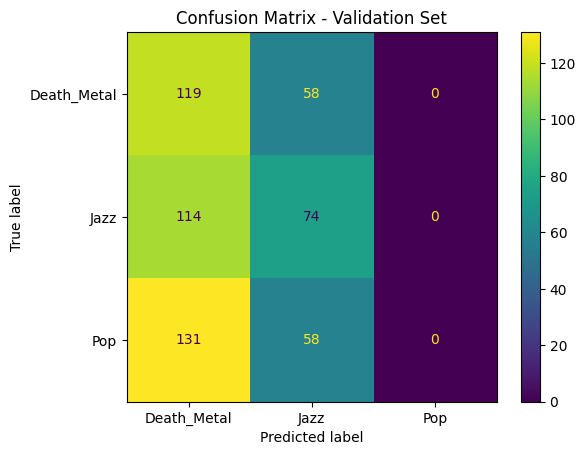

In [12]:
# 1. Construction du modèle à 4 couches cachées
def build_model_4_layers():
    model = models.Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())
    
    for _ in range(4):
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))  # 3 classes
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 2. Entraînement du modèle
print("\nEntraînement du modèle avec 4 layers et 7 epochs...")
modele = build_model_4_layers()
history_4_layers_7_epochs = modele.fit(
    train_generator,
    epochs=7,
    validation_data=validation_generator
)


# Prédictions sur les données de validation
val_predictions = np.argmax(modele.predict(validation_generator), axis=1)
val_true_labels = validation_generator.classes

# Matrice de confusion
conf_mat = confusion_matrix(val_true_labels, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Validation Set")
plt.show()



Training model with 3 epochs...
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step

Training model with 4 epochs...
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step

Training model with 5 epochs...
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step

Training model with 6 epochs...
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step


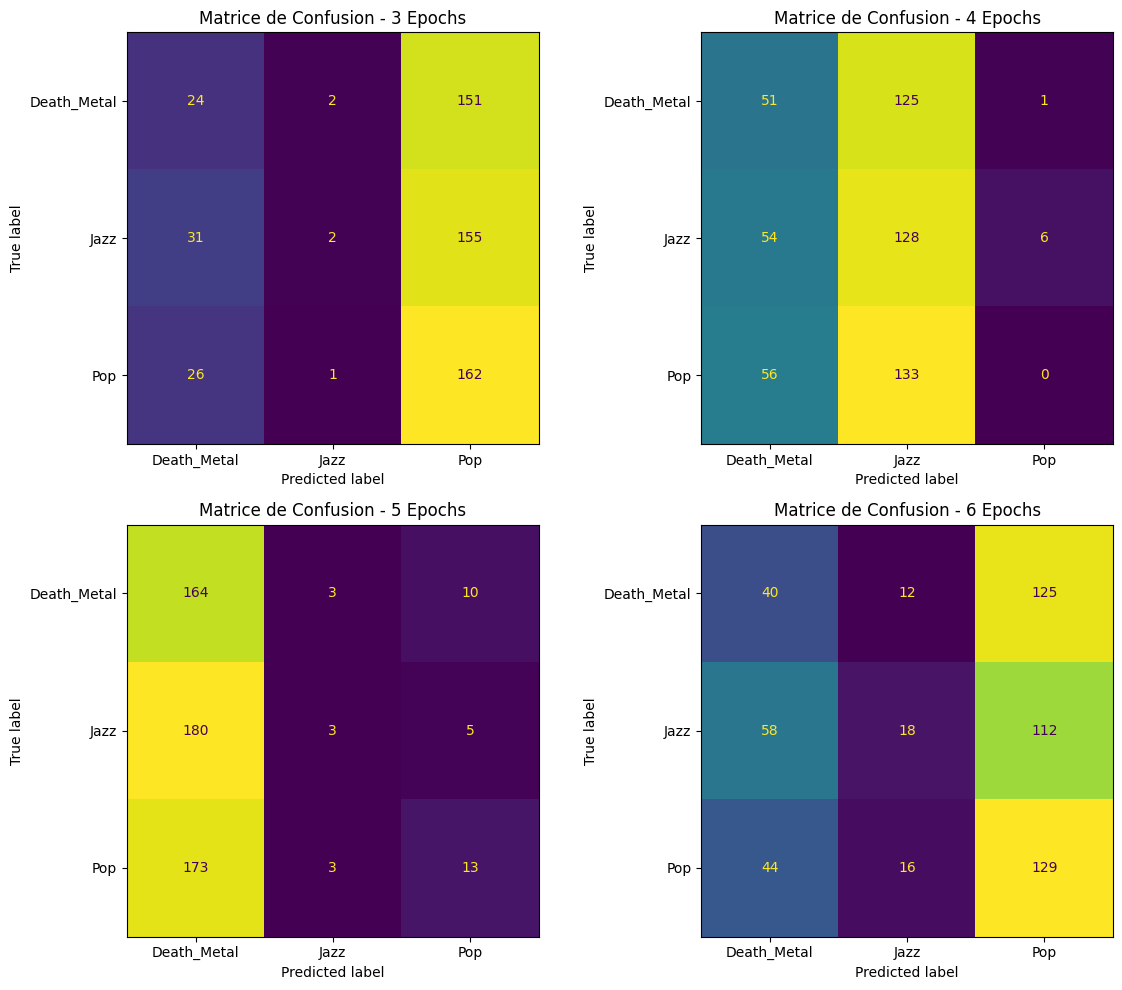

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Fonction pour construire le modèle
def build_model_4_layers():
    model = models.Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())
    
    for _ in range(4):
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))  # 3 classes
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Liste des epochs
epochs_list = [3, 4, 5, 6]

# Préparer une figure pour tracer les matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, epochs in enumerate(epochs_list):
    print(f"\nTraining model with {epochs} epochs...")
    # Entraîner le modèle
    model = build_model_4_layers()
    model.fit(train_generator, epochs=epochs, validation_data=validation_generator, verbose=0)

    # Prédictions sur les données de validation
    val_predictions = np.argmax(model.predict(validation_generator), axis=1)
    val_true_labels = validation_generator.classes

    # Matrice de confusion
    conf_mat = confusion_matrix(val_true_labels, val_predictions)
    
    # Affichage de la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=validation_generator.class_indices.keys())
    disp.plot(ax=axes[idx], cmap='viridis', colorbar=False)
    axes[idx].set_title(f"Confusion Matrix - {epochs} Epochs")

plt.tight_layout()
plt.show()


CNN handmade

Found 2226 images belonging to 3 classes.
Found 554 images belonging to 3 classes.


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 389ms/step - accuracy: 0.3247 - loss: 1.4360 - val_accuracy: 0.4368 - val_loss: 1.0712
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 366ms/step - accuracy: 0.4532 - loss: 1.0489 - val_accuracy: 0.4856 - val_loss: 1.0655
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 372ms/step - accuracy: 0.4609 - loss: 1.0348 - val_accuracy: 0.4819 - val_loss: 1.0250
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.5088 - loss: 0.9910 - val_accuracy: 0.5036 - val_loss: 1.0296
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 366ms/step - accuracy: 0.5081 - loss: 0.9822 - val_accuracy: 0.4675 - val_loss: 0.9881
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.5204 - loss: 0.9636 - val_accuracy: 0.5126 - val_loss: 0.9918
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.5276 - loss: 0.9597 - val_accuracy: 0.4531 - val_loss: 1.0230
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.5304 - loss: 0.9391 - val_accu

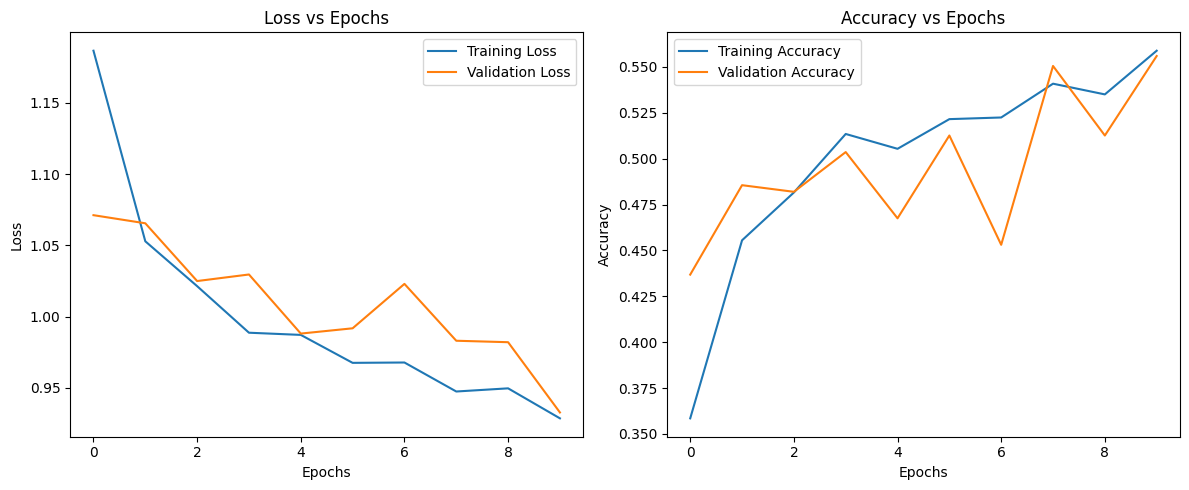

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Préparation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% pour la validation
)

train_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Création du modèle CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes (pop, jazz, death metal)
])

# Compilation du modèle
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement avec Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[callback]
)

# Visualisation des performances
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# Affichage de l'accuracy de train et de test (validation)
train_accuracy = history.history['accuracy'][-1]  # Dernière valeur de l'accuracy de l'entraînement
val_accuracy = history.history['val_accuracy'][-1]  # Dernière valeur de l'accuracy de la validation

print(f"Training Accuracy (after last epoch): {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy (after last epoch): {val_accuracy * 100:.2f}%")


Training Accuracy (after last epoch): 55.88%
Validation Accuracy (after last epoch): 55.60%


Saving the Model

In [8]:
cnn_model.save('cnn_music_genre.keras')